## Logical Computations with Neurons
* artificial neuron
  * one or more binary inputs and one binary output

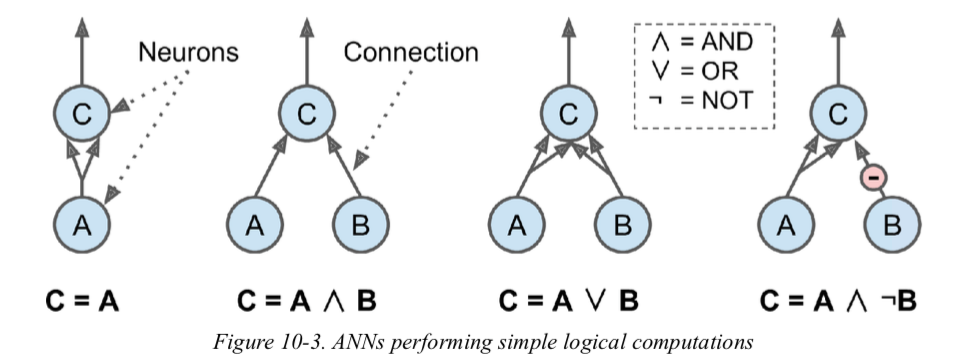

### The Perceptron
* inputs and outputs are numerical values instead of binary values
* each input is associated with a weight
* uses a TLU (threshold logic unit) or LTU (logical threshold unit)
* computes the weighted sum of its input and applies a step function:
\begin{equation} h_w(x) = step(x^Tw) \end{equation}

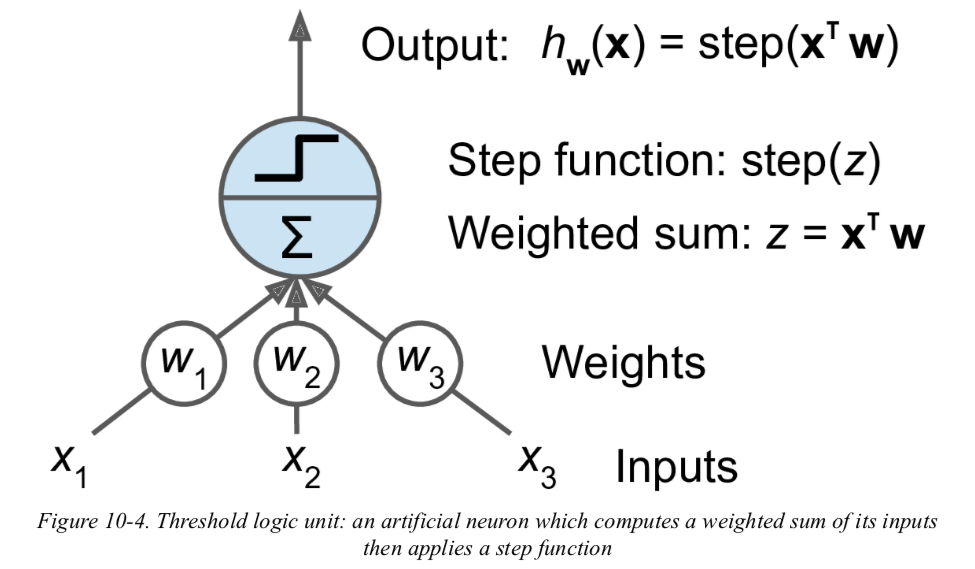

* fully connected layer or dense layer
  * all neurons in layer are connected to every neuron in the previous layer
* bias neuron is added for bias
  * usually outputs a 1 for all the time

\begin{equation} h_{W,b}(X) = \phi(XW + b) \end{equation}

* X: matrix of input features
  * one row per observation and one column per feature
* W: weight matrix 
  * contains all connection weights except for bias neuron
  * one row per input neuron and one column for each neuron in the layer
* b: bias vector
  * contains all the connection weights between bias neuron and artificial neuron
  * one bias neuron per artifical neuron
* $\phi$: activation function

* “Cells that fire together, wire together.” - Hebb's rule
  * the connection weight between two neurons tends to increase when they fire simultaneously
* reinforces connections that help reduce the error
  * Perceptron is fed one training observation at a time, and for each observation makes a prediction
    * for every output neuron that produced a wrong prediction, it reinforces the connection weight from the inputs that would have contributed to the correct prediction

\begin{equation} \omega_{i,j}^{(next step)} = \omega_{i,j} + \eta(y_j-\hat{y}_j)x_i \end{equation}

* $\omega_{i,j}$: connection weight between ith input neuron and the jth output neuron
* $x_i$: ith input value of the current training observation
* $\hat{y}_j$: output of the jth output neuron for the current observation
* $y_j$: target output of the jth output neuron for the current training observation
* $\eta$: learning rate


* Perceptron convergence theorem
  * if observations are linearly separable, then algorithm will converge to a solution

In [1]:
# Loading in Iris data

import numpy as np
from sklearn.datasets import load_iris

## Loading in data
iris = load_iris()

## Only using petal length and petal width as features
X = iris.data[:, (2,3)]

## Creating a binary output (is it setosa or not)
y = (iris.target == 0).astype(np.int)

In [2]:
# Implementing a single TLU (threshold logic unit)

from sklearn.linear_model import Perceptron

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

### The Multilayer Perceptron and Backpropagation
* consists of more than one layer
  * input layer -> hidden layers -> output layer
* Deep Neural Network (DNN)
  * stack of hidden layers
* back propagation
  * compute gradient of the network's error with regard to every single model parameter in just two passses of network (forward and backward)
  * finds out how each connection weight and each bias term should be tweaked in order to reduce error
  * performs Gradient Descent when weights and biases are found
  * repeats process until network converges
* need to initialize all the hidden layers' connection weights randomly
  * if all weights are the same, then backpropagation will affect them in exactly the same way
    * all neurons will be identical (symmetry)


#### Back Propagation
1. handles one mini-batch at a time and goes through the full training set multiple times
  * each pass is called an epoch
2. forward pass: each mini-batch is passed to the network's input layer, which sends it to the first hidden layer
  * algorithm computes output of all neurons in this layer (for every observation in the mini-batch) and passed to the next layer
3. algorithm measures network's output error
  * uses a loss function to compare actual and predicted
4. computes how much each output connection contributed to the error by using the chain rule
5. measures how much these error contributions came from each connection in the layer prior using the chain rule, working backward until algorithm reaches the input layer.
  * reverse pass measures error gradient across all the connection weights in the network by propagating the error gradient backward through the network
6. performs Gradient Descent step to tweak all the connection weights in network using the error gradients it just computed


SUMMARY:
for each observation the backpropagation algorithm goes through a forward pass: predicts and measures the error. Then goes through a reverse pass: goes through each layer in reverse to measure the error contribution from each connection and then tweaks the connection weights to reduce error.

#### Activation Functions
* sigmoid function (logistic function) is a better activation function than a step function because there is a nonzero derivative in a sigmoid function. There is no gradient in a flat line (step functions)
* hyperbolic tangent function: $ \tanh(z)=2\sigma(2z)-1$
  * S-shaped, continuous, and differentiable
  * output values are from -1 to 1
    * make each layer's output more or less centered around 0 which helps speed up convergence
* Rectified Linear Unit $ ReLU(Z) = max(0,z)$
  * continuous but not differentiable at z = 0
  * derivative is 0 if z < 0
  * fast to compute

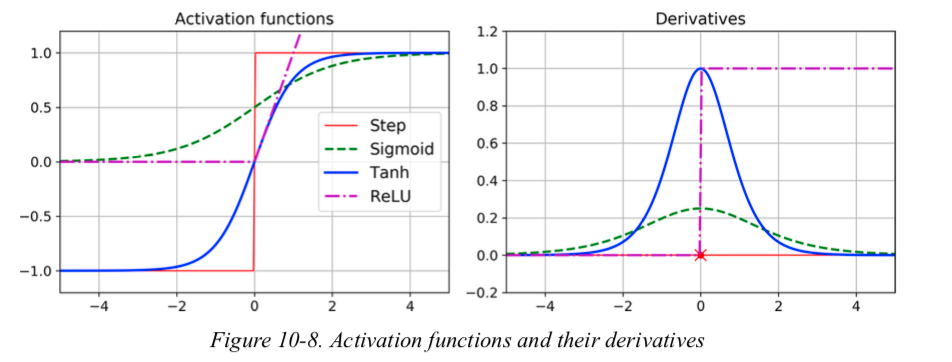

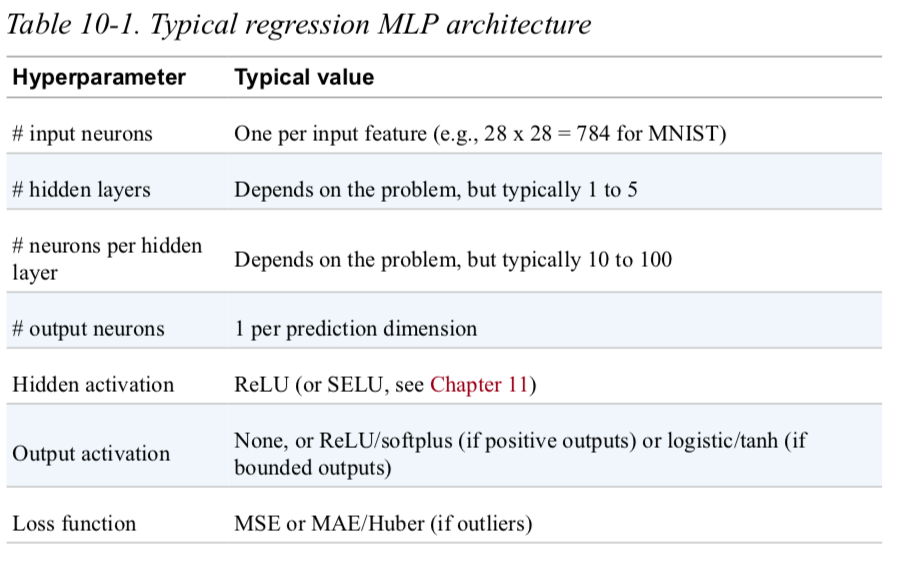

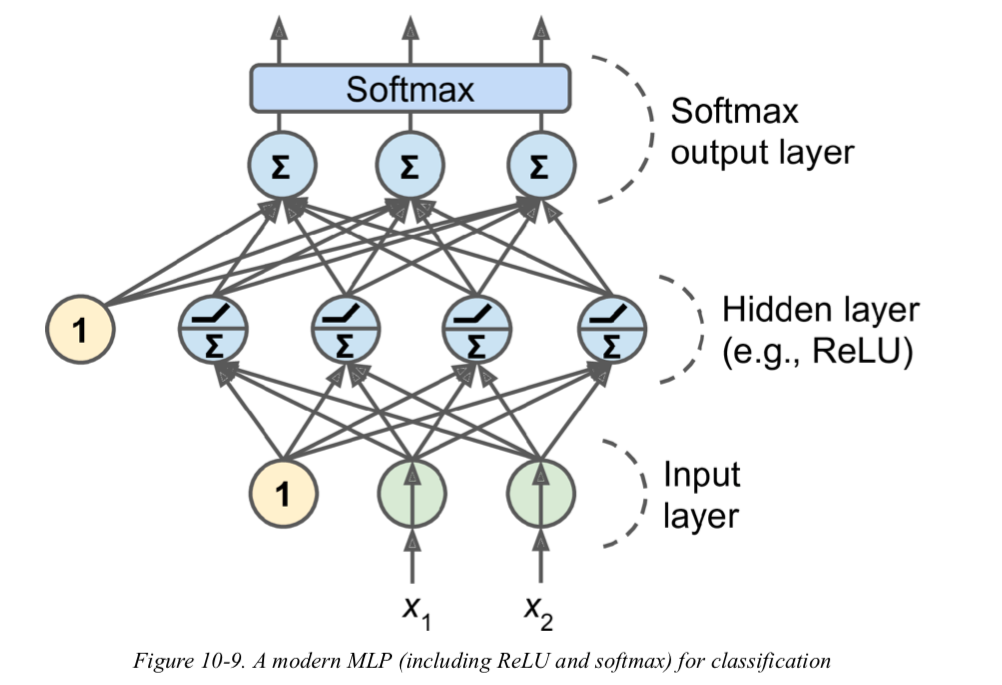

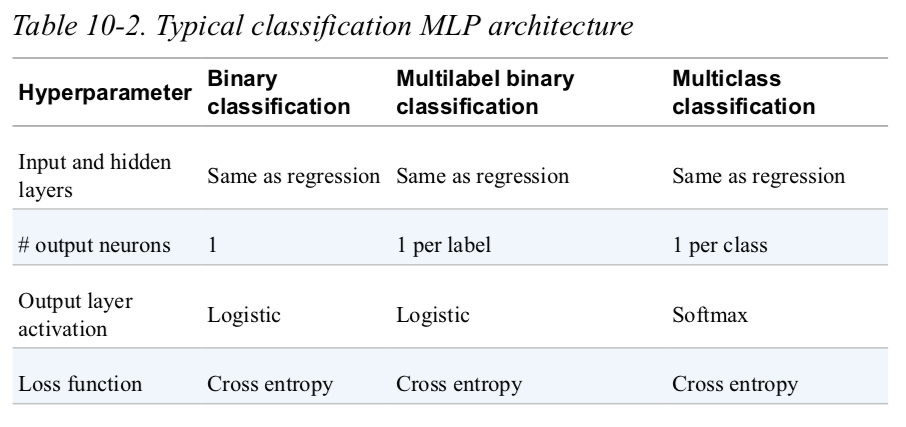

#### Building an Image Classifier using Sequential API

In [3]:
# Loading in the Fashion MNIST data with Keras

## Imports
import tensorflow
from tensorflow import keras

## Laoding in data
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

## Printing shape and type of X_train_full
print(f'X_train_full shape: {X_train_full.shape}')
print(f'X_train_full type: {X_train_full.dtype}')

4423680/4422102 [==============================] - 0s 0us/step
X_train_full shape: (60000, 28, 28)
X_train_full type: uint8


In [4]:
# Scaling the features of train and splitting them further into train and test

X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [5]:
# Creating a list of class names

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 
               'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

class_names[y_train[0]]

'Coat'

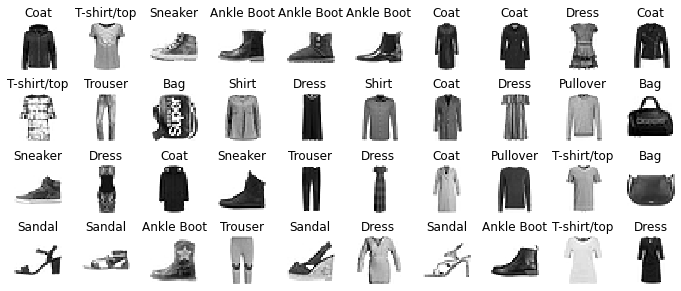

In [6]:
# Plotting images

import matplotlib.pyplot as plt

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols*1.2, n_rows*1.2))
for row in range(n_rows):
  for col in range(n_cols):
    index = n_cols * row + col
    plt.subplot(n_rows, n_cols, index+1)
    plt.imshow(X_train[index], cmap='binary', interpolation='nearest')
    plt.axis('off')
    plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [7]:
# Implementing a sequential model

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


* Sequential API
  * a single stack of layers connected sequentially
* Flatten Layer
  * converts input dimenstions into (-1,1) -> (any number, 1 column)
* Dense Layer
  * manages its own weight matricies (neurons and their inputs)
  * manages a vector of bias terms (one per neuron)
  * last layer has 10 neurons (one per each class)

In [8]:
# Getting a list of all the layers

model.layers

In [9]:
# Extracting a layer from the model

hidden1 = model.layers[1]
print(hidden1.name)

dense


In [10]:
# Extracting the weights and biases from a layer

weights, biases = hidden1.get_weights()
print(f'Weights: {weights}')
print(f'Shape of Weights: {weights.shape}')
print(f'Biases: {biases}')
print(f'Shape of Biases: {biases.shape}')

Weights: [[ 0.00305039  0.05686063 -0.06733336 ... -0.05398896 -0.02660504
   0.01193956]
 [ 0.01597828  0.02858854 -0.01630611 ...  0.05515058 -0.03948155
  -0.06558876]
 [-0.01367186 -0.05878953  0.00684037 ... -0.04268508  0.05526552
   0.07231592]
 ...
 [ 0.07308351 -0.05448519  0.03240069 ...  0.01059035 -0.00106982
  -0.04363438]
 [ 0.01443791  0.00109123  0.03416274 ...  0.00250171 -0.03815416
   0.01417904]
 [ 0.02595752  0.05408244  0.06256728 ...  0.03241099 -0.04792436
   0.07219821]]
Shape of Weights: (784, 300)
Biases: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.

In [11]:
# Compiling the model

model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='sgd',
  metrics=['accuracy']
)

In [ ]:
# Training the model

history = model.fit(
    X_train,
    y_train,
    epochs=30,
    validation_data=(X_valid, y_valid)
)

Epoch 1/30
1719/1719 [==============================] - 7s 3ms/step - loss: 0.7213 - accuracy: 0.7618 - val_loss: 0.5402 - val_accuracy: 0.8154
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4892 - accuracy: 0.8279 - val_loss: 0.4541 - val_accuracy: 0.8440
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4432 - accuracy: 0.8433 - val_loss: 0.4239 - val_accuracy: 0.8548
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4160 - accuracy: 0.8533 - val_loss: 0.4272 - val_accuracy: 0.8494
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3949 - accuracy: 0.8602 - val_loss: 0.3771 - val_accuracy: 0.8700
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3801 - accuracy: 0.8661 - val_loss: 0.3731 - val_accuracy: 0.8720
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3672 - accuracy: 0.8699 - val_loss: 0.4046 - val_accuracy:

In [ ]:
# Plotting the loss and accuracy

import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

* model has not converged yet because validation is still going down
* change the learning rate -> then try another optimizer

In [ ]:
# Evaluating the model

model.evaluate(X_test, y_test)

In [ ]:
# Predicting the class probabilities

X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

In [ ]:
# Predicting the class

y_pred = np.argmax(model.predict(X_new), axis=1)
y_pred
np.array(class_names)[y_pred]

#### Building a Regression MLP Using the Sequential API

In [ ]:
# Loading in California housing data

from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

In [ ]:
# Splitting data into train, validation, test sets

from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [ ]:
# Scaling the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
# Creating the model 

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [ ]:
# Compiling the model

model.compile(
  loss="mean_squared_error",
  optimizer="sgd"
)

In [ ]:
model.summary()

In [ ]:
# Training the model

history = model.fit(
    X_train,
    y_train,
    epochs=20,
    validation_data=(X_valid, y_valid)
)

In [ ]:
# Evaluating the model

mse_test = model.evaluate(X_test, y_test)
mse_test

In [ ]:
 # Predicting

 X_new = X_test[:3]
 y_pred = model.predict(X_new)
 y_pred

#### Building Complex Models Using Functional API
* used for models that has layers that are NOT sequential
  * Wide and Deep Neural Network, Residual Networks

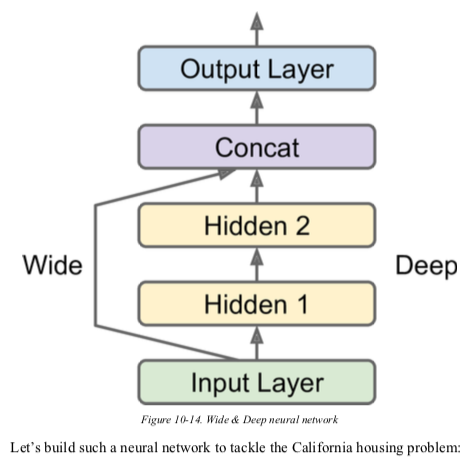

In [ ]:
# Implementing Wide & Deep NN using Functional API

input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

model.summary()

# a layer can be used as a function in Functional API

In [ ]:
# Compiling and fitting

model.compile(
  loss="mean_squared_error",
  optimizer="sgd"
)

history = model.fit(
    X_train,
    y_train,
    epochs=3,
    validation_data=(X_valid, y_valid)
)

#### Adding multiple inputs
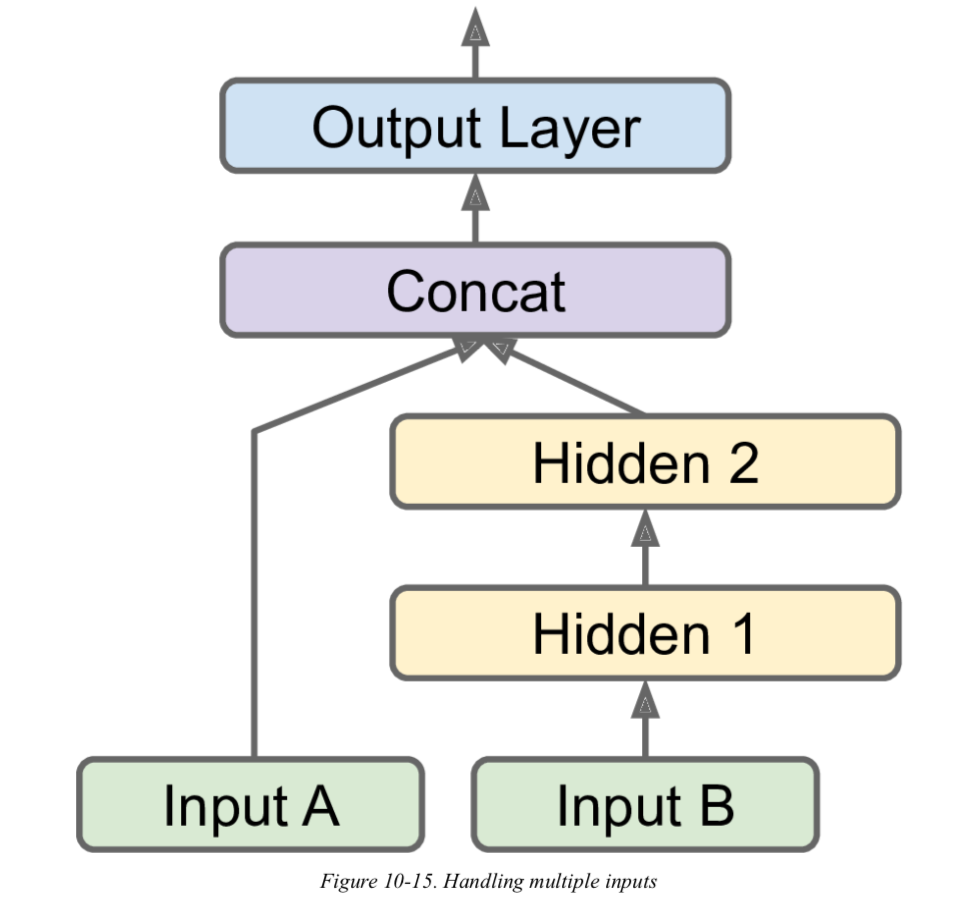

In [ ]:
# Using two different inputs

input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='output')(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

model.summary()

In [ ]:
# Compiling the model

model.compile(
  loss='mse',
  optimizer=keras.optimizers.SGD(learning_rate=1e-3)
)

In [ ]:
# Formatting the data for the multi-input model

X_train_A , X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [ ]:
# Fitting the model

history = model.fit(
  (X_train_A, X_train_B),
  y_train,
  epochs=20,
  validation_data=(
    (X_valid_A, X_valid_B),
    y_valid
  )
)

In [ ]:
# Evaluating the model

mse_test = model.evaluate(
  (X_test_A, X_test_B),
  y_test
)

mse_test

In [ ]:
# Predicting the model

y_pred = model.predict(
  (X_new_A, X_new_B)
)

y_pred

#### Using the Subclassing API to Build Dynamic Models
* Sequential and Funcional APIs are declarative
  * declare which layers to use and how they should be connected
  * then feed the model for training
  * advantages
    * save, clone and share the models
    * structure can be displayed and analyzed
    * framework can infer shapes and check types
  * disadvantages
    * static
      * models might need loops, varying shapes, conditional branching, and other dynamic behaviors
* Subclassing API
  * more dynamic / imperative programming style
  * model architecture is hidden
  * cannot check types, shapes

In [ ]:
# Implementing Subclass API

class WideAndDeepModel(keras.Model):
  def __init__(self, units=30, activation='relu', **kwargs):
    super().__init__(**kwargs)
    self.hidden1 = keras.layers.Dense(units, activation=activation)
    self.hidden2 = keras.layers.Dense(units, activation=activation)
    self.main_output = keras.layers.Dense(1)
    self.aux_output = keras.layers.Dense(1)
  
  def call(self, inputs):
    input_A, input_B = inputs
    hidden1 = self.hidden1(input_B)
    hidden2 = self.hidden2(hidden1)
    concat = keras.layers.concatenate([input_A, hidden2])
    main_output = self.main_output(concat)
    aux_output = self.aux_output(hidden2)
    return main_output, aux_output

model = WideAndDeepModel()

#### Saving and Restoring a Model
* saves model's architecture, including hyperparameters, and values of all the model parameters

In [35]:
# # Saving model
# model.save('xyz.h5')

# # Loading model
# model = keras.models.load_model('xyz.h5')

#### Using Callbacks
* fit() accepts a list of callbacks that Keras calls at start and/or end of training, of each epoch, of processing each batch

In [36]:
# # Implementing Early stopping using Keras

# # Creating early stopping
# checkpoint_cb = keras.callbacks.ModelCheckpoint(
#   'my_keras_model.h5',
#   save_best_only=True
# )

# # Implementing Keras' early stopping
# early_stopping_cb = keras.callbacks.EarlyStopping(
#   patience=10,
#   restore_best_weights=True
# )

In [37]:
# # Passing in a callback in fit

# history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

In [38]:
# Creating a custom callback

class PrintValTrainRatioCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    print('\nval/train: {:.2f}'.format(logs['val_loss']/logs['loss']))

#### Using TensorBoard for Visualization
* interactive visualization tool used to view:
  * learning curves during training
  * compare learning curves between multiple runs
  * visualize the computation graph
  * analyze training statistics
  * view images generated by model
  * visualize complex multidimensional data projected down to 3D 
* need to modify program so that it outputs the data desired to visualize to special binary log files called event files
  * each binary data record is called a summary
* need to point TB server to a root log directory and configure program that writes to a different subdirectory every time it runs

In [39]:
# Defining root log directory for tensorboard

import os
root_logdir = os.path.join(os.curdir, 'my_logs')

In [40]:
# Function that generates a subdirectory path based on current date and time

def get_run_logdir():
  import time
  run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S')
  return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [41]:
# Implementing Wide & Deep NN using Functional API

## Creating a Functional API
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

## Compiling model
model.compile(
  loss="mean_squared_error",
  optimizer="sgd"
)

In [42]:
# Implementing the TensorBoard Callback

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(
  X_train,
  y_train,
  epochs=30,
  validation_data=(X_valid, y_valid),
  callbacks=[tensorboard_cb]
)

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 2.6601 - val_loss: 0.7598
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 5/30
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 6/30
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 7/30
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 8/30
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 10/30
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 11/30
363/363 [==============================] 

In [43]:
!tensorboard --logdir=./my_logs --port=6006

2021-07-07 19:33:28.015753: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.5.0 at http://localhost:6006/ (Press CTRL+C to quit)
^C


In [ ]:
!python3 -m tensorboard.main --logdir=./my_logs --port=6006

## Fine-Tuning Neural Network Hyperparameters
* more flexible models -> more hyperparameters to tweak
* try many combinations of hyperparameters
  * K-Fold CV
  * GridSearchCV or RandomizedSearchCV


In [ ]:
# Implementing a wrapper for Keras

def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
  model = keras.models.Sequential()
  model.add(keras.layers.InputLayer(input_shape=input_shape))
  for layer in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons, activation='relu'))
  model.add(keras.layers.Dense(1))
  optimizer = keras.optimizers.SGD(lr=learning_rate)
  model.compile(loss='mse', optimizer=optimizer)
  return model

In [ ]:
# Wrapping 

keras_reg = keras.wrapper.scikit_learn.KerasRegressor(build_model)

In [ ]:
# Fitting the keras model


keras_reg.fit(
  X_train, 
  y_train, 
  epochs=100,
  validation_data=(X_valid, y_valid),
  callbacks=[keras.callbacks.EarlyStopping(patience=10)]
)
'''Any additional parameters in fit get passed into Keras model'''

mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

In [ ]:
# Implementing RandomizedSearch

from scipy.stats import reciprocal 
from sklearn.model_selection import RandomizedSearchCV

param_distribs = (
  'n_hidden': [0, 1, 2, 3],
  'n_neurons': np.arange(1, 100),
  'learning_rate': reciprocal(3e-4, 3e-2)
)

## Creating the RandomizedSearch
rnd_search_cv = RandomizedSearchCV(
  keras_reg,
  param_distribs,
  n_iter=10,
  cv=3
)

## Fitting the RandomizedSearch
rnd_search_cv.fit(
  X_train,
  y_train,
  epochs=100,
  validation_data=(X_valid, y_valid),
  callbacks=[keras.callbacks.EarlyStopping(patience=10)]
)

In [ ]:
# Viewing the best parameters

rnd_search_cv.best_params_

In [ ]:
# Viewing the best score

rnd_search_cv.best_score_

In [ ]:
# Extracting the model with the best parameters

model = rnd_search_cv.best_estimator__.model

* These search algorithms can take long and not be efficient
* zooming: when a region is found that is good, use that region to fine tune the model more
  * Hyperopt
  * Hyperas
  * Keras Tuner
  * Scikit-Optimize (skopt)
  * Spearmint
  * Hyperband
  * Sklearn-Deep
* DeepMind: https://arxiv.org/abs/1711.09846
* AutoML
  * Google searches for best hyperparameters AND best network architecture

#### Number of Hidden Layers
* deeper networks have a higher parameter efficiency than shallower ones
  * model complex functions using exponentially fewer neurons than shallower ones 
  * converge faster and generalize better
* transfer learning: use weights learned from a different model as the starting point

#### Number of Neurons per Hidden Layer
* input layer and output layer determined by the data and task
* might be better to create a model with many layers and neurons and use regularization
  * "stretch pants"
    * instead of finding a perfect pant, get a bigger stretch pants and shrink it
  * Dropout
  * EarlyStopping


#### Learning Rate
* most important hyperparameter
* train model for few hundred iterations
  * start with a small rate (10e-5) and gradually increase it to 10
  * plot loss as a function of log of learning rate
    * the optimal learning rate is a bit lower than the point where the loss starts to climb

#### Optimizer
* use other optimizers (Chapter 11)

#### Batch Size
* large batch size works well with hardware accelerators
* however leads to training instabilities
  * results might not generalize well
* suggestion: 
  * use large batch size, using learning rate warmup 
    * if training is unstable or final performance sucks, try small batch size

#### Number of Iterations
* use earlystopping